
# 🎬 시나리오 기반 머신러닝 미션: 마케팅 전략과 건강 예측의 과학

당신은 데이터 과학자로 고용된 **헬스&뷰티 스타트업**의 분석 팀장입니다.  
회사의 마케팅 부서는 **광고 예산이 매출에 어떤 영향을 주는지**를 알고 싶어 하고,  
제품 개발 부서는 **사용자의 건강 데이터를 기반으로 당뇨병 위험군을 조기에 예측**하고자 합니다.

이번 프로젝트의 목표는 다음과 같습니다:

- 📈 **광고 채널별 효과 분석**을 통해 최적의 마케팅 예산 배분 전략을 수립한다.
- 🧪 **정규화 회귀 모델**을 통해 중요하지 않은 변수를 제거하고 모델 해석력을 높인다.
- ❤️ **건강 진단 데이터**를 통해 당뇨병 고위험군을 조기에 예측하여 건강 서비스를 제안한다.

이 시나리오를 바탕으로 실제 데이터를 분석하고 예측 모델을 만들어봅시다!


## 🎯 미션 1: 선형회귀 (Linear Regression)

설명: TV, 라디오, 신문 광고 예산에 따른 제품 매출을 예측하는 선형 회귀 모델을 만들어보세요.

데이터: Advertising.csv (TV, Radio, Newspaper, Sales)

지시사항:

1. 데이터셋을 불러오고 탐색하세요.

2. TV, Radio, Newspaper를 feature로 하여 Sales를 예측하는 선형 회귀 모델을 만들어보세요.

3. 예측 정확도를 R² score로 확인하세요.

4. 각 feature의 계수를 해석해보세요.




In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#데이터 로드 
#데이터 url 
url = "https://raw.githubusercontent.com/chandanverma07/DataSets/master/Advertising.csv"

#데이터 불러오기 
df = pd.read_csv(url)

print(df.head())

#독립변수, 종속변수 설정
X = df[['TV', 'radio', 'newspaper']]
y = df[['sales']]

#학습용/테스트용 분리 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#모델 학습 
lr = LinearRegression()
lr.fit(X_train, y_train)

#예측 및 평가 
y_pred = lr.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

#회귀 계수 확인
coeff_df = pd.DataFrame(lr.coef_.ravel(), X.columns, columns=["Coefficient"])
print(coeff_df)

#lr.coef_ : 모델이 학습한 결과를 담고 있는 모델 속성. (학습된 계수값)
#lr.coef_ : 모델이 학습한 각 feature의 계수



   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
R² Score: 0.899438024100912
           Coefficient
TV            0.044730
radio         0.189195
newspaper     0.002761


## 회귀 계수 해석

- TV 광고(TV) : 계수가 0.044730. TV 광고 예산이 1 단위 증가할 때, 매출이 평균적으로 약 0.0447 증가한다는 것을 의미. TV 광고는 매출에 긍정적인 영향을 미친다.
- 라디오 광고 : 계수가 0.189195. 라디오 광고가 티비 광고보다 매출에 더 큰 영향을 미친다.
- 신문 광고 : 계수가 0.002761. 신문 광고는 매출에 거의 영향을 미치지 않는 것으로 보인다.

##### 🎯신문의 계수가 매우 작다는 점에서, 신문 광고는 매출에 유의미한 영향을 미치지 않을 가능성이 있아. 이는 모델 해석력을 높이기 위해 신문 광고 변수를 젲거하거나 정규화 기법을 적용해볼 필요가 있음을 나타낸다. 
##### 🎯그리고 R² Score = 0.8994로 매우 높아, 이 모델이 매출 변동의 약 89.94%를 설명할 수 있음을 나타내고, 즉 모델의 설명력이 우수하다. 



## 🎯 미션 1-2: 릿지 회귀 (Ridge Regression)

**설명**: L2 정규화를 통해 과적합을 방지하고 모델의 안정성을 확보합니다.
설명: 같은 데이터를 사용하되 릿지 회귀로 정규화 효과를 확인해보세요.

지시사항:

1. 동일한 feature로 릿지 회귀 모델을 학습시키되, alpha 값을 [0.01, 1, 100]로 설정해 비교하세요.

2. 각 모델의 계수 변화와 R² 점수를 시각화하세요.

3. 어떤 alpha 값이 가장 좋은 성능을 보였는지 해석해보세요.


Ridge alpha=0.01 | R²: 0.8994380249089622
           Coefficient
TV            0.044730
radio         0.189195
newspaper     0.002761
Ridge alpha=1 | R²: 0.8994381046330401
           Coefficient
TV            0.044730
radio         0.189189
newspaper     0.002763
Ridge alpha=100 | R²: 0.8994433694759678
           Coefficient
TV            0.044731
radio         0.188561
newspaper     0.002936


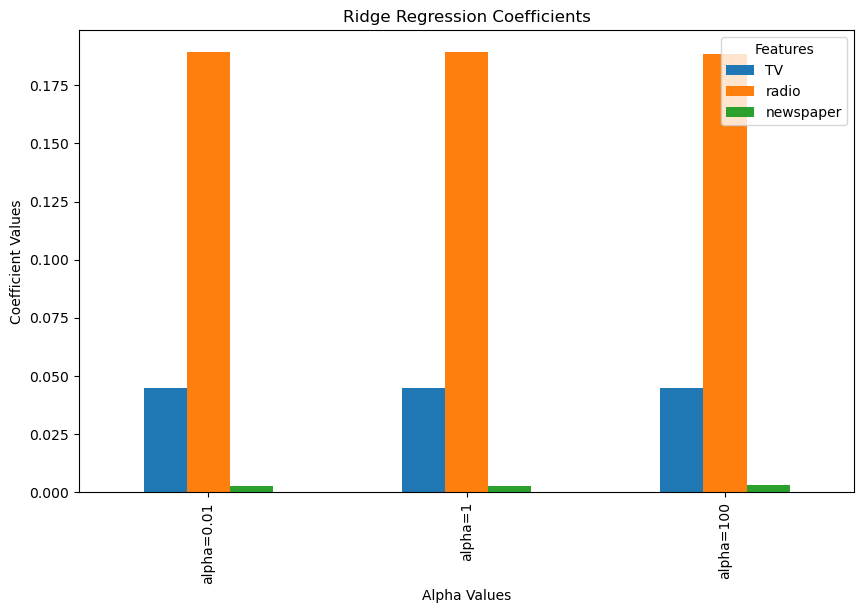

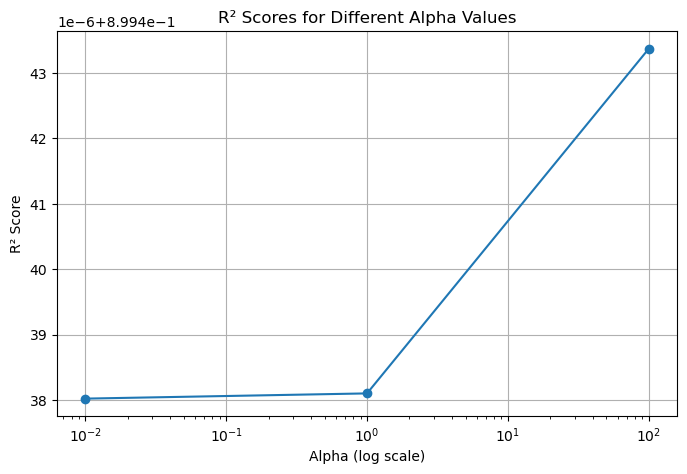

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

#alpha 값 리스트 
alphas = [0.01, 1, 100]

#결과 저장용 리스트
coefficients = [] 
r2_scores = [] 

#릿지 회귀 모델 학습 및 평가 
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    #R² 점수 저장
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    #계수 저장
    coefficients.append(ridge.coef_.ravel())

    print(f"Ridge alpha={alpha} | R²: {r2}")
    print(pd.DataFrame(ridge.coef_.ravel(), X.columns, columns=["Coefficient"]))

#alpha는 정규화 강도를 조절하는 하이퍼파라미터. 
#alpha=0 이면 그냥 선형 회귀랑 같음
#alpha가 클수록 모델의 계수를 작게 억제해서 과적합을 막음.
#여러개의 알파값을 시도하면서 각각의 릿지 모델을 만들고 학습하고 예측 

# 계수 변화 시각화
coefficients = pd.DataFrame(coefficients, columns=X.columns, index=[f"alpha={a}" for a in alphas])
coefficients.plot(kind='bar', figsize=(10, 6))
plt.title("Ridge Regression Coefficients")
plt.xlabel("Alpha Values")
plt.ylabel("Coefficient Values")
plt.legend(title="Features")
plt.show()

# R² 점수 시각화
plt.figure(figsize=(8, 5))
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.title("R² Scores for Different Alpha Values")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()


## 결과 해석
계수 변화: alpha 값이 커질수록 계수의 크기가 작아지며, 이는 정규화 효과로 인해 모델이 더 단순화되는 것을 의미.
R² 점수: 가장 높은 R² 점수를 보이는 alpha 값을 선택하여 최적의 모델을 결정.


## 🎯 미션 1-3: 라쏘 회귀 (Lasso Regression)


설명: Lasso 회귀는 불필요한 feature의 계수를 0으로 만드는 특성이 있습니다.

지시사항:

1. alpha 값을 [0.01, 1, 100]로 조절하여 Lasso 회귀 모델을 학습시키세요.

2. 계수가 0이 되는 feature가 있는지 확인하고 시각화하세요.

3. 어떤 변수가 모델에서 제외되었는지 해석해보세요.


Lasso alpha=0.01 | R²: 0.8994494345844188
           Coefficient
TV            0.044728
radio         0.189157
newspaper     0.002748
Lasso alpha=1 | R²: 0.9004013443377963
           Coefficient
TV            0.044631
radio         0.185350
newspaper     0.001422
Lasso alpha=100 | R²: 0.5914934201049302
           Coefficient
TV            0.032409
radio         0.000000
newspaper     0.000000


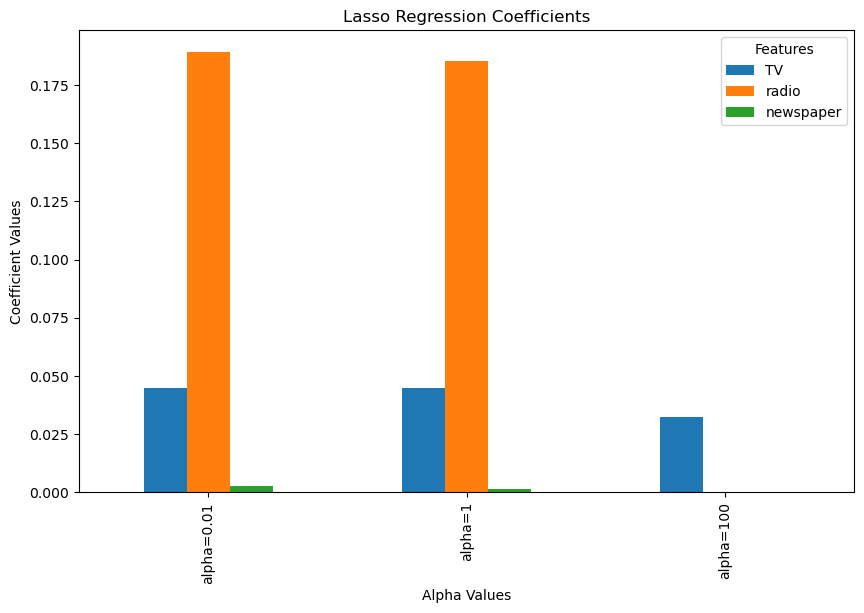

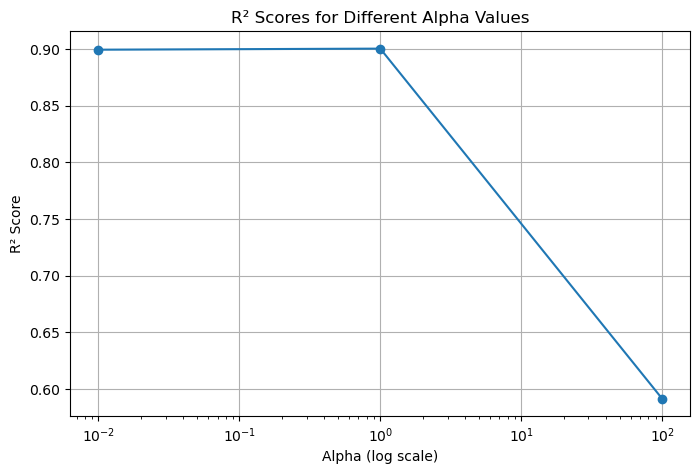

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alphas = [0.01, 1, 100]
coefficients = []
r2_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    coefficients.append(lasso.coef_)
    print(f"Lasso alpha={alpha} | R²: {r2}")
    print(pd.DataFrame(lasso.coef_, X.columns, columns=["Coefficient"]))

# 계수 변화 시각화
coefficients = pd.DataFrame(coefficients, columns=X.columns, index=[f"alpha={a}" for a in alphas])
coefficients.plot(kind='bar', figsize=(10, 6))
plt.title("Lasso Regression Coefficients")
plt.xlabel("Alpha Values")
plt.ylabel("Coefficient Values")
plt.legend(title="Features")
plt.show()

# R² 점수 시각화
plt.figure(figsize=(8, 5))
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.title("R² Scores for Different Alpha Values")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

# 결과 해석
- Lasso 효과 -> alpha 값이 커질수록 중요하지 않은 feature의 계수가 0이 된다.
- 계수가 0이 된 features는 모델에서 제외 된 것으로 해석.
- alpha = 100에서 과하게 정규화됨 -> 중요한 변수가 제거되서 성능 낮아짐. 

# 모델을 개선하기 위한 방법

1. **Feature Engineering**
- 불필요한 변수 제거 : newspaper 변수는 계수가 매우 작아 매출에 유의미한 영향을 미치지 않을 가능성이 있습니다. 이를 제거하여 모델의 단순성과 해석력을 높일 수 있습니다.
- 새로운 변수 생성: 광고 채널 간 상호작용 효과(예: TV * radio)를 추가하여 매출에 대한 복합적인 영향을 분석할 수 있습니다.
2. **정규화 기법 적용**
- 릿지 회귀 (Ridge Regression): L2 정규화를 통해 과적합을 방지하고 모델의 안정성을 높일 수 있습니다.
- 라쏘 회귀 (Lasso Regression): L1 정규화를 통해 중요하지 않은 변수의 계수를 0으로 만들어 모델을 간소화할 수 있습니다.
3. **데이터 전처리**
- 스케일링: StandardScaler 또는 MinMaxScaler를 사용하여 feature를 정규화하면 모델 학습이 더 안정적일 수 있습니다.
- 결측치 처리: 데이터셋에 결측치가 있다면 이를 처리하여 모델 성능 저하를 방지합니다.
4. **모델 평가 및 튜닝**
- 교차 검증 (Cross-Validation): 데이터를 여러 번 나누어 학습 및 평가하여 모델의 일반화 성능을 확인합니다.
- 하이퍼파라미터 튜닝: GridSearchCV 또는 RandomizedSearchCV를 사용하여 릿지와 라쏘의 alpha 값을 최적화합니다.
5. **비선형 모델 시도**
- 선형 회귀 모델이 데이터의 패턴을 충분히 설명하지 못한다면, 비선형 모델(예: 결정 트리, 랜덤 포레스트, XGBoost)을 시도해볼 수 있습니다.
6. **잔차 분석**
- 잔차(실제 값과 예측 값의 차이)를 분석하여 모델이 특정 패턴을 놓치고 있는지 확인합니다. 잔차가 비정상적으로 크거나 특정 패턴을 보인다면, 추가적인 feature를 고려하거나 모델을 변경해야 할 수 있습니다.
7. **데이터 증강**
- 데이터가 부족하다면, 추가 데이터를 수집하거나 증강 기법을 사용하여 데이터셋을 확장할 수 있습니다.
- 이러한 방법들을 단계적으로 적용하여 모델의 성능을 점진적으로 개선할 수 있습니다.

